<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/ESAA_HW_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH9 1~4 562-579

(파이썬 머신러닝 완벽 가이드)
## [CH9 추천 시스템]



### 01. 추천 시스템의 개요와 배경
#### 추천 시스템의 개요
사용자가 어떤 상품을 구매했는가? 어떤 상품을 둘러보거나 장바구니에 넣었는가? 무엇을 클릭했는가? 제품 평가는? 등의 데이터가 추천 시스템을 구성하는 데 사용될 수 있음
#### 추천 시스템의 유형
콘텐츠 기반 필터링 방식  
협업 필터링 방식 (최근접 이웃 협업 필터링, 잠재 요인 협업 필터링)  
대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템 적용





### 02. 콘텐츠 기반 필터링 추천 시스템
* 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식  
ex) 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독 등이 유사한 다른 영화를 추천해줌

### 03. 최근접 이웃 협업 필터링
* 친구들에게 물어보는 것과 유사한 방식
* 협업 필터링 방식 : 사용자와 비슷한 사용자의 행동 양식만을 기반으로 추천을 수행, 사용자가 평가하지 않은 아이템의 예측 평가를 도출

#### 사용자-아이템 평점 행렬
행은 개별 사용자, 열은 개별 아이템으로 구성, 값은 평점을 나타내는 형태
* 희소 행렬 특성 가짐

최근접 이웃 협업 필터링은 다음과 같이 나뉨  
1) 사용자 기반 - 당신과 비슷한 고객들이 다음 상품도 구매했습니다
* 타 사용자 간의 유사도를 측정한 뒤 가장 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천함

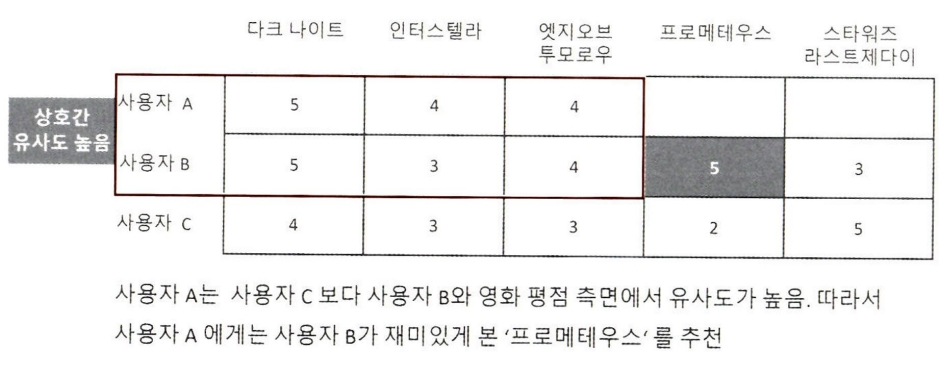

2) 아이템 기반 - 이 상품을 구매한 다른 고객들은 다음 상품도 구매했습니다
* 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 됨

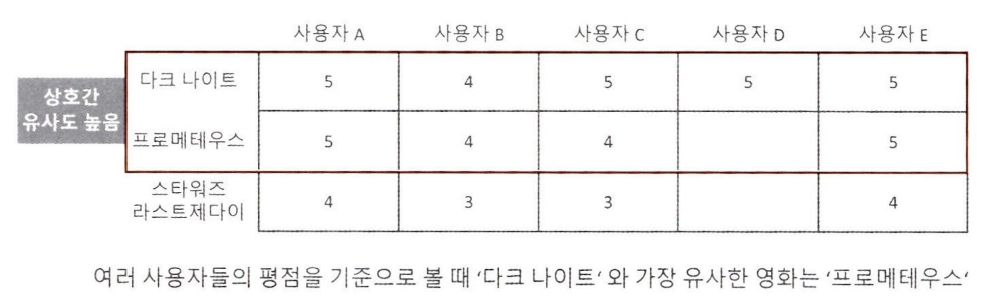


* 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음, 그래서 대부분 아이템 기반을 적용하기도 함

### 04. 잠재 요인 협업 필터링
* 사용자-아이템 평점 행렬 속에 숨어있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
* 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출
* 이러한 기법을 행렬 분해(Matrix Factorization)이라고 함
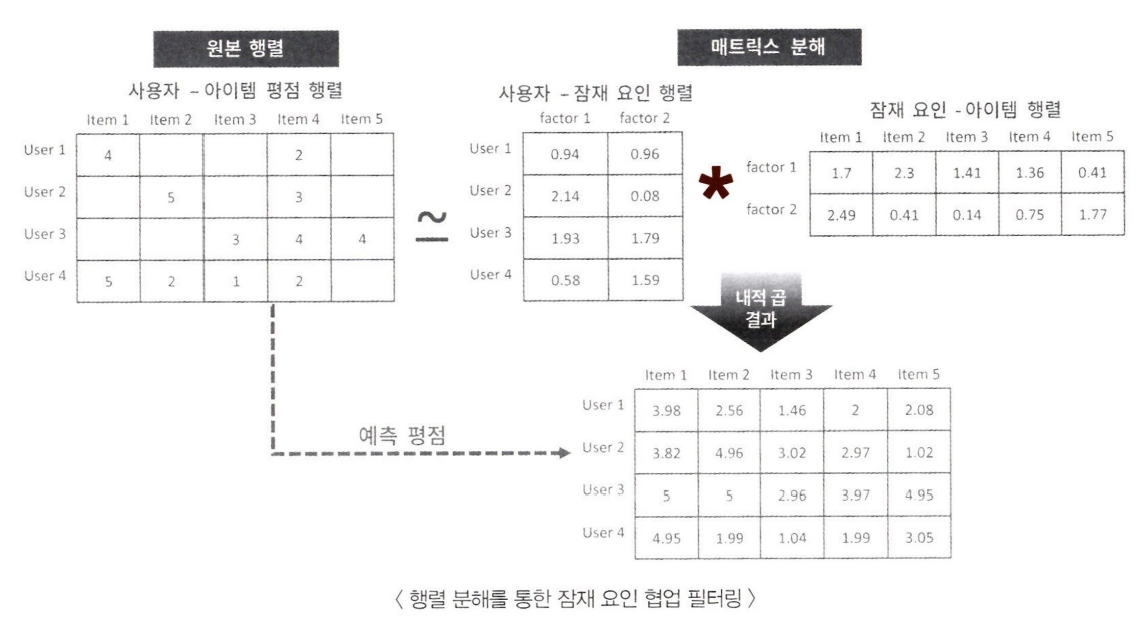



* 행렬 분해 기법을 이용해 사용자-잠재 요인, 잠재 요인-아이템 행렬로 분해
* 내적 곱을 통해 새로운 사용자-아이템 예측 평점 행렬 생성



#### 행렬 분해의 이해
* 대표적으로 SVD, NMF 존재  

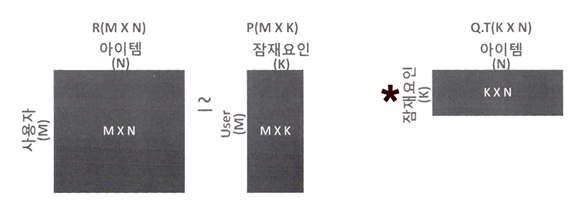

#### 확률적 경사 하강법을 이용한 행렬 분해
* P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것  
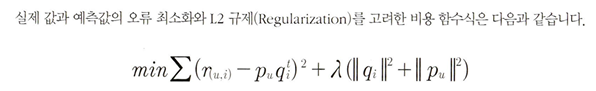


In [4]:
import numpy as np
# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4,np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3,1],
              [np.NaN, np.NaN, 3,4,4],
              [5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users,K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [5]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q, non_zeros):
  error=0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해  실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind,y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return mse

In [6]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] >0]

steps=1000
learning_rate=0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r-np.dot(P[i,:], Q[j,:].T)
    # Regularization 을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:]+learning_rate*(eij*Q[j,:]-r_lambda*P[i,:])
    Q[i,:] = Q[i,:]+learning_rate*(eij*P[i,:]-r_lambda*Q[j,:])
  rmse = get_rmse(R,P,Q, non_zeros)
  if (step%50) ==0:
    print('### iteration step :', step, "rmse:",rmse)

### iteration step : 0 rmse: 10.47522280446722
### iteration step : 50 rmse: 3.418585982566469
### iteration step : 100 rmse: 3.273734855096425
### iteration step : 150 rmse: 3.464220850838796
### iteration step : 200 rmse: 3.4322385531999733
### iteration step : 250 rmse: 3.3864046022230117
### iteration step : 300 rmse: 3.27191594953962
### iteration step : 350 rmse: 3.5611823070899007
### iteration step : 400 rmse: 3.5730741261624885
### iteration step : 450 rmse: 3.5555201049264924
### iteration step : 500 rmse: 3.5425397660106603
### iteration step : 550 rmse: 3.5704393570420603
### iteration step : 600 rmse: 3.6452169448009655
### iteration step : 650 rmse: 3.722272244280297
### iteration step : 700 rmse: 3.7134141829891543
### iteration step : 750 rmse: 3.1486523640340036
### iteration step : 800 rmse: 3.8211742690886097
### iteration step : 850 rmse: 3.7096692914597043
### iteration step : 900 rmse: 3.7531498311026827
### iteration step : 950 rmse: 3.892945147497157


In [7]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix,3))

예측 행렬:
 [[  3.969 -17.204  16.879   2.011   0.496]
 [ -0.413   4.97   -1.872   3.044   0.075]
 [  0.892   0.247   3.106   4.226   0.271]
 [  0.316  -0.13   -1.4    -0.745   0.072]]
